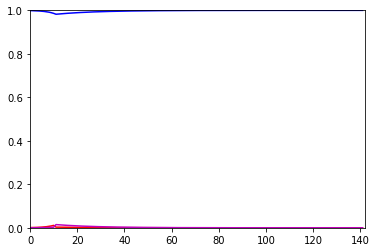

     xPlots    wPlots    dPlots    hPlots
0         0  0.999000  0.001000  0.000000
1         1  0.998600  0.001120  0.000280
2         2  0.998194  0.001445  0.000361
3         3  0.997671  0.001864  0.000466
4         4  0.996995  0.002404  0.000600
5         5  0.996124  0.003101  0.000774
6         6  0.995001  0.004000  0.000999
7         7  0.993552  0.005160  0.001287
8         8  0.991684  0.006656  0.001660
9         9  0.989275  0.008585  0.002139
10       10  0.986170  0.011074  0.002756
11       11  0.982167  0.003098  0.014735
12       12  0.983157  0.002923  0.013921
13       13  0.984092  0.002757  0.013151
14       14  0.984976  0.002601  0.012422
15       15  0.985812  0.002454  0.011734
16       16  0.986602  0.002315  0.011082
17       17  0.987349  0.002184  0.010467
18       18  0.988055  0.002060  0.009885
19       19  0.988721  0.001944  0.009335
20       20  0.989351  0.001834  0.008815
21       21  0.989947  0.001730  0.008323
22       22  0.990509  0.001632  0

-3.4459167266545947

In [11]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation(simData):
    #load variables
    d=simData['d']
    qW=simData['qW']
    qD=simData['qD']
    qH=simData['qH']
    sW=simData['sW']
    sD=simData['sD']
    a=simData['a']
    if simData['curGen']<=simData['induceStart']:
        e=simData['e']
    else:
        e=a*simData['eP']+(1-a)*simData['e']
    #manuscript equations
    #variables to prevent redundant multiplication
    w2=(qW*(1-sW))**2
    wd=qW*(1-sW)*(qD*(1-sD))
    wh=qW*(1-sW)*(qH*(1-sD*d))
    d2=(qD*(1-sD))**2
    dh=qD*(1-sD)*(qH*(1-sD*d))
    h2=(qH*(1-sD*d))**2
    
    qWP=w2+wh+.25*h2
    qDP=e*(2*wd+wh+dh+.5*h2)+d2+dh+.25*h2
    qHP=(1-e)*(2*wd+wh+dh+.5*h2)
    
    #bring total frequency back up to 1 and catch float rounding errors
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}

def run_simulation(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plot_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0


simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.3,'e':.8,'d':.5,'eP':.1,'a':.9,'generations':1000,'induceStart':10}
run_simulation(simData,True,True)